In [25]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.cm as cm
from pathlib import Path
import norm
import physconst as pc
from vtk_reader import read_vtk

In [2]:
data_dir = Path('/Users/satoukakeru/lab/Jet_Torus/runs')
#run_ids = ['00a', '00a2']
run_ids = ['00a2']
fname = 'accretion_rate.dat'

In [3]:
data_fbase = 'data'
data_type = 'flt'
#ndata = [116, 302]
ndata = [302]
grid = [128, 128, 128]
nvar = 7
x1_min, x1_max = -5., 5.  # code units
x2_min, x2_max = -5., 5.  # code units
x3_min, x3_max = -5., 5.  # code units
dx1 = (x1_max - x1_min) / grid[0]
dx2 = (x2_max - x2_min) / grid[1]
dx3 = (x3_max - x3_min) / grid[2]
cell_volume = dx1 * dx2 * dx3

nm = norm.PhysNorm(x=pc.pc, v=pc.c, dens=0.60364*pc.amu, temp=pc.c*pc.c*pc.amu/pc.kboltz, curr=1.)
fnum2year = nm.t / pc.yr * 24.5009005929988

In [21]:
mass = []
for ir, run_id in enumerate(run_ids):
    for idata in range(ndata[ir]-1)[:201]:
        data_fname = data_dir / run_id / f'{data_fbase}.{idata:0>4d}.{data_type}'

        if data_type == 'flt':
            hydro = np.fromfile(data_fname, dtype=np.float32).reshape((nvar, grid[2], grid[1], grid[0]))
            density = hydro[0, :, :, :]

        elif data_type == 'vtk':
            with open(data_fname, 'rb') as fp:
                hydro = read_vtk(fp, grid[0], grid[1], grid[2])

        mass.append(np.sum(density) * cell_volume * nm.m / pc.msun)

    mass_diff = -np.diff(mass)
    n_mass = mass_diff.size
    time = (np.arange(201) + 1) * fnum2year
    time_diff = np.diff(time)
    mdot = mass_diff / time_diff

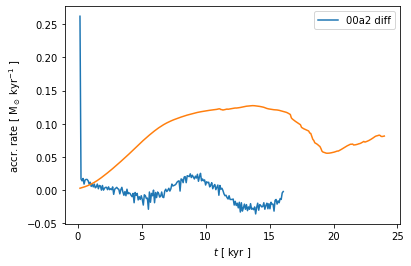

In [22]:
pl.plot(time[1:] / 1000., mdot * 1000, label=f'{run_id} diff')
pl.xlabel(r'$t$ [ kyr ]')
pl.ylabel(r'accr. rate [ M$_\odot$ kyr$^{-1}$ ]')
pl.legend()

for run_id in run_ids:
    acc_time, acc_rate, acc_power, mbh, edd_power = np.loadtxt(data_dir / run_id / fname, unpack=True)
    u_time, ui = np.unique(acc_time, return_index=True)
    pl.plot(u_time / 1000., acc_rate[ui] * 1000, label=f'{run_id} flux')

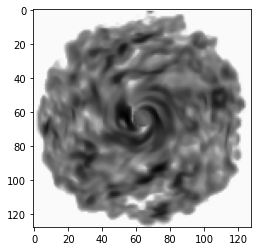

In [30]:
pl.imshow(np.log10(density[64, :, :]), cmap=cm.Greys)

In [ ]:
pl.savefig('acc_rate.png', dpi=300, bbox_inches='tight')
pl.savefig('acc_rate.pdf', bbox_inches='tight')

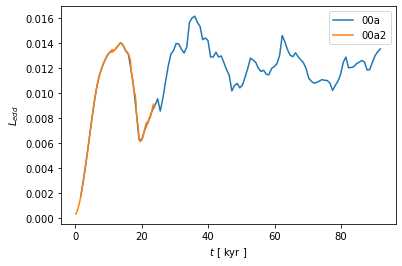

In [8]:
for run_id in run_ids:
    time, acc_rate, acc_power, mbh, edd_power = np.loadtxt(data_dir / run_id / fname, unpack=True)
    u_time, ui = np.unique(time, return_index=True)
    pl.plot(u_time / 1000., acc_power[ui] / edd_power[ui], label=run_id)

pl.xlabel(r'$t$ [ kyr ]')
pl.ylabel(r'$L_{edd}$')
pl.legend()

In [ ]:
pl.savefig('edd_ratio.png', dpi=300, bbox_inches='tight')
pl.savefig('edd_ratio.pdf', bbox_inches='tight')